# Machine Learning Workshop

Machine Learning is a technique to make the computer programs that are capable of learning. There are three important categories of algorithms under Machine Learning:

* Supervised Learning
* Unsupervised Learning
* Reinforcement Learning

We will cover in this workshop some examples of supervised learning algorithms and unsupervised learning algorithms.

## Short introduction in Jupyter Notebook

Jupyter Notebook is an enviroment that allows you to write documents and run Python code in the same page.

In [1]:
print("Hello world, Jupyter!")

Hello world, Jupyter!


In [2]:
value = 0

In [3]:
value += 1

In [4]:
print(value)

1


## Supervised Learning
### Neural Network

Neural networks are capable of approximating functions very well. However, in order to make good predictions they need to be trained.

We will try to build a model that detects hand written digits from some image. We will use the data made available [here](http://yann.lecun.com/exdb/mnist/). You don't need to worry about downloading the files from that link, they were already included next to this document. Just by calling the function *mnist_loader.load_data()* you can retrieve the data.



In [5]:
import mnist_loader

training_data, validation_data, test_data = mnist_loader.load_data()

The function returns three data sets: one for training, one for validation and one for test. This is a common practice in training models. The data is usually splitted in two parts: the first one is used for training and the second one for testing. We do this because we want to see how well the trained model behaves on unseen data.

Now, let's visualize and understand the data.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

print(training_data)

def displayDigit(data):
    X = data
    X = X.reshape((28, 28))
    plt.imshow(X, cmap="gray")
    plt.show()

displayDigit(training_data[0][0])

(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([5, 0, 4, ..., 8, 4, 8]))


<Figure size 640x480 with 1 Axes>

The *training_data* array is a tuple with two values:

1. An array of images. Each image is an array with 28 x 28 values between 0 and 1 representing the color of the pixels.
2. An array that contains the actual numbers that are represented in the images.

In order to get, for example, the pixel values of the 5th image, we have to index it like this: training_data[0][5]. First we take the array of images and in this array we go to the 5th position.

Once we understood how the data is structured, let's move forward and start training a neural network that detects digits in these images.

For this we will use the [SciKit learn library](https://scikit-learn.org/stable/).

From this library we use the [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) which is the neural network implementation for classification problems.

The neural network has a lot of parameters that can be adjusted in order to make better predictions.
* **hidden_layer_sizes** is the number of units in each hidden layers. For example, hidden_layer_sizes=(10, 5, 6) is a neural network with 3 hidden layers: the first one with 10 neurons, the second one with 5 neurons and the last one with 6 neurons.
* **The activation function** is the function that decides if and how the neuron activates.

In order to train the network, the *fit* method is called and it receives two parameters. The first one is the an array with data and the second one an array with what values the output should have.

In [7]:
from sklearn.neural_network import MLPClassifier as NeuralNetwork

print("Training started. This might take some time...")

# Create the network.
network = NeuralNetwork(hidden_layer_sizes=(5,), activation='tanh')

# We train the network using the training data.
network.fit(training_data[0], training_data[1])

print("Training done...")

Training started. This might take some time...
Training done...


/Users/bogdanvlad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


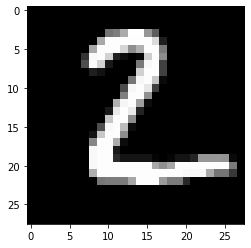

[2]


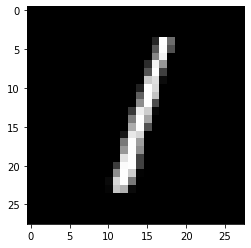

[1]


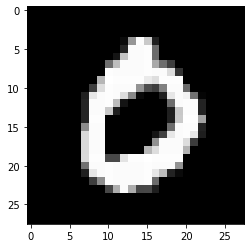

[0]


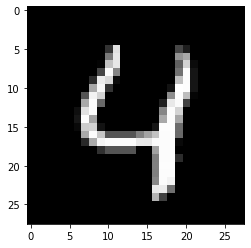

[4]


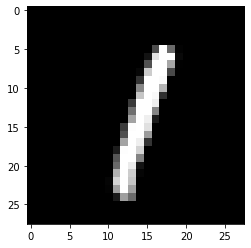

[1]


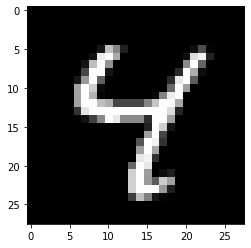

[4]


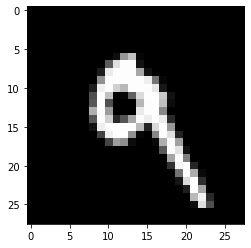

[9]


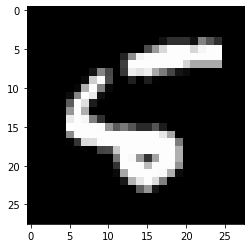

[6]


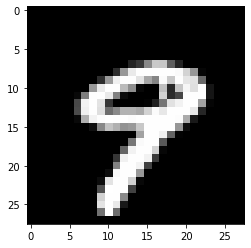

[9]


In [8]:
for i in range(1, 10):
    displayDigit(test_data[0][i])

    print(network.predict([test_data[0][i]]))

Play a bit with the network and its number of layers and see what results you get.

Let's see now how important it is to have enough data to train your model. Let's train a neural network with only a quarter of the data that we have available and see how it behaves.

Training started. This might take some time...
Training done...


/Users/bogdanvlad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


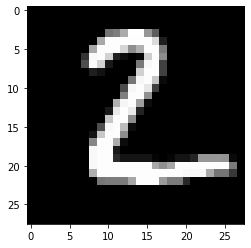

[2]


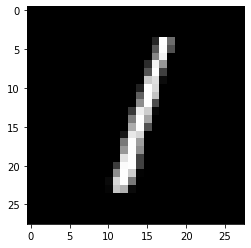

[1]


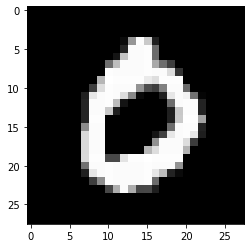

[0]


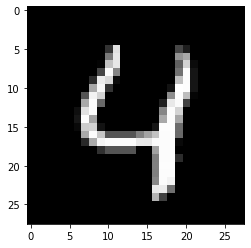

[4]


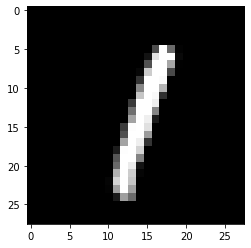

[1]


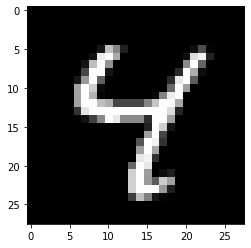

[4]


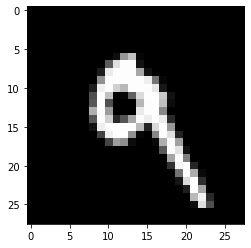

[9]


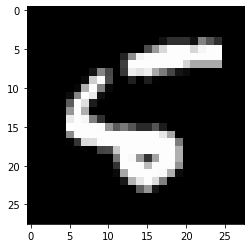

[8]


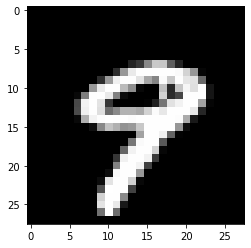

[9]


In [15]:
print("Training started. This might take some time...")

# Create the network.
partialDataNetwork = NeuralNetwork(hidden_layer_sizes=(5,), activation='tanh')
training_images = training_data[0]
training_images_result = training_data[1]

# We train the network using the training data.
partialDataNetwork.fit(training_images[: 100], training_images_result[: 100])

print("Training done...")

# 
for i in range(1, 10):
    displayDigit(test_data[0][i])

    print(partialDataNetwork.predict([test_data[0][i]]))

## Unsupervised learning

In unsupervised learning, the data does not contain the correct output. Unsupervised learning is more focused on finding clusters in data.

### K Clustering

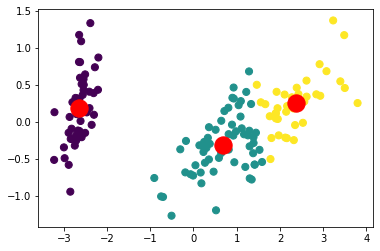

In [10]:
from sklearn.datasets import load_iris
import matplotlib.pylab as pl
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

data = load_iris()

# Process the data. Only get features, ignore classes
pca = PCA()
X = pca.fit(data.data).transform(data.data)  

# Create the model and train
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Predict 
prediction = kmeans.predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=prediction, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

## Good study resources

* http://neuralnetworksanddeeplearning.com/chap1.html
* https://www.youtube.com/watch?v=aircAruvnKk